In [6]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 로드
data = pd.read_csv('winequality-red.csv')

In [7]:
# 데이터 확인
print("데이터 샘플:")
print(data.head())

데이터 샘플:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8  

In [8]:
# 2. 주요 특성 선택
features = data.drop(columns=['quality'])

In [9]:
# 3. 데이터 정규화 (StandardScaler 사용)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [10]:
# 4. K-Means 클러스터링 (클러스터 수 = 3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

In [11]:
# 클러스터 레이블을 원래 데이터프레임에 추가
data['Cluster'] = clusters

In [12]:
# 5. 클러스터별 특성 평균값 확인
cluster_means = data.groupby('Cluster').mean()
print("\n클러스터별 평균값:")
print(cluster_means)


클러스터별 평균값:
         fixed acidity  volatile acidity  citric acid  residual sugar  \
Cluster                                                                 
0             7.189889          0.609342     0.123047        2.214058   
1            10.067131          0.405080     0.469761        2.582570   
2             8.155467          0.535173     0.289680        3.105467   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
Cluster                                                                   
0         0.078553            13.507618             34.894737  0.995896   
1         0.100460            10.888446             30.627490  0.997574   
2         0.087235            27.108000             89.954667  0.997276   

               pH  sulphates    alcohol   quality  
Cluster                                            
0        3.405762   0.609224  10.494044  5.552632  
1        3.195040   0.752131  10.724037  5.960159  
2        3.284267   0.626533   9.88315

In [13]:
# 6. 클러스터와 와인 품질(quality) 간 관계 확인
quality_cluster_relation = data.groupby('Cluster')['quality'].value_counts().unstack()
print("\n클러스터별 품질 분포:")
print(quality_cluster_relation)


클러스터별 품질 분포:
quality    3     4      5      6      7     8
Cluster                                      
0        7.0  38.0  303.0  304.0   63.0   7.0
1        3.0   9.0  135.0  223.0  122.0  10.0
2        NaN   6.0  243.0  111.0   14.0   1.0


In [14]:
# 7. PCA로 2D 차원 축소
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

In [15]:
# PCA 결과를 데이터프레임에 추가
data['PCA1'] = pca_components[:, 0]
data['PCA2'] = pca_components[:, 1]

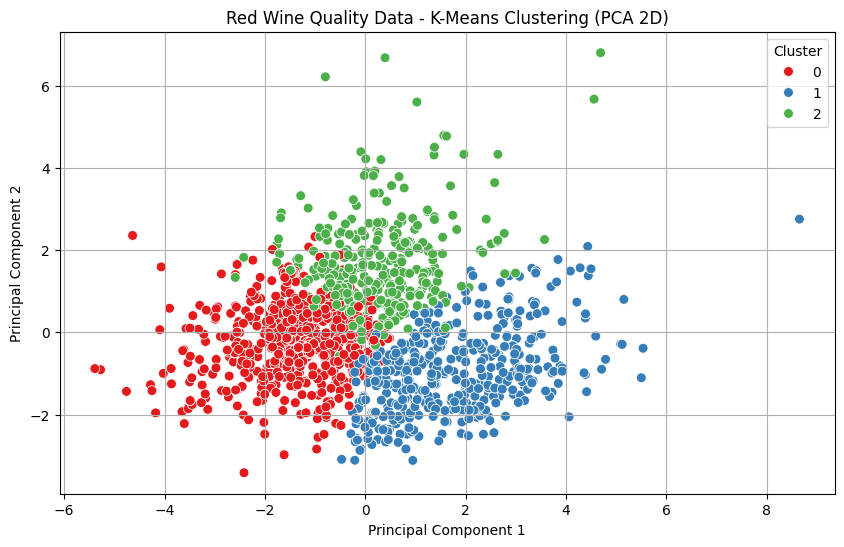

In [16]:
# 8. 클러스터링 결과 시각화
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=50)
plt.title('Red Wine Quality Data - K-Means Clustering (PCA 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()